We will perform EDA on the 2010s spotify songs dataset and try to find out if there is some sort of connection between the various features and the fact that whether a song is a hit or a flop.

The author's condition of a track being 'flop' is as follows:

        - The track must not appear in the 'hit' list of that decade.
        - The track's artist must not appear in the 'hit' list of that decade.
        - The track must belong to a genre that could be considered non-mainstream and / or avant-garde. 
        - The track's genre must not have a song in the 'hit' list.
        - The track must have 'US' as one of its markets.

In [35]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns',None)

In [36]:
dataset = pd.read_csv('dataset-of-10s.csv')
dataset.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6398 non-null   object 
 1   artist            6398 non-null   object 
 2   uri               6398 non-null   object 
 3   danceability      6398 non-null   float64
 4   energy            6398 non-null   float64
 5   key               6398 non-null   int64  
 6   loudness          6398 non-null   float64
 7   mode              6398 non-null   int64  
 8   speechiness       6398 non-null   float64
 9   acousticness      6398 non-null   float64
 10  instrumentalness  6398 non-null   float64
 11  liveness          6398 non-null   float64
 12  valence           6398 non-null   float64
 13  tempo             6398 non-null   float64
 14  duration_ms       6398 non-null   int64  
 15  time_signature    6398 non-null   int64  
 16  chorus_hit        6398 non-null   float64


In [38]:
dataset['duration_ms']=dataset['duration_ms']/(1000*60)
dataset=dataset.drop(columns=['uri'])
dataset.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,3.141550,4,41.18681,10,1
1,Surfboard,Esquivel!,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,2.948000,3,33.18083,9,0
2,Love Someone,Lukas Graham,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,3.424383,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,3.217383,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,2.404067,4,24.99199,8,1


In [39]:
dataset.rename(columns = {'duration_ms':'duration_mins'}, inplace = True)
dataset.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,3.141550,4,41.18681,10,1
1,Surfboard,Esquivel!,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,2.948000,3,33.18083,9,0
2,Love Someone,Lukas Graham,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,3.424383,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,3.217383,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,2.404067,4,24.99199,8,1


In [40]:
dataset = dataset.drop(columns=['track','artist'])
dataset.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,chorus_hit,sections,target
0,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,3.141550,4,41.18681,10,1
1,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,2.948000,3,33.18083,9,0
2,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,3.424383,4,44.89147,9,1
3,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,3.217383,4,29.52521,7,0
4,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,2.404067,4,24.99199,8,1


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      6398 non-null   float64
 1   energy            6398 non-null   float64
 2   key               6398 non-null   int64  
 3   loudness          6398 non-null   float64
 4   mode              6398 non-null   int64  
 5   speechiness       6398 non-null   float64
 6   acousticness      6398 non-null   float64
 7   instrumentalness  6398 non-null   float64
 8   liveness          6398 non-null   float64
 9   valence           6398 non-null   float64
 10  tempo             6398 non-null   float64
 11  duration_mins     6398 non-null   float64
 12  time_signature    6398 non-null   int64  
 13  chorus_hit        6398 non-null   float64
 14  sections          6398 non-null   int64  
 15  target            6398 non-null   int64  
dtypes: float64(11), int64(5)
memory usage: 799

We will now check if the dataset contains any discrete features.

In [42]:
discrete_features = [feature for feature in dataset.columns if len(dataset[feature].unique())<10 and feature!='target']
discrete_features

['mode', 'time_signature']

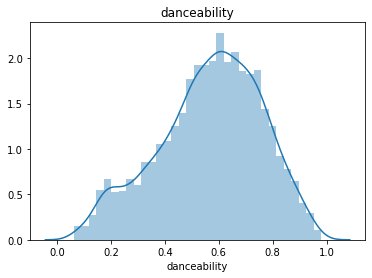

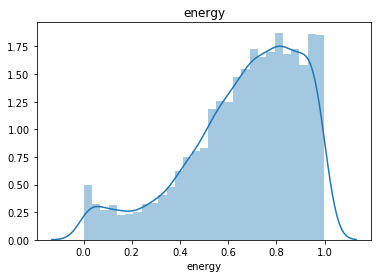

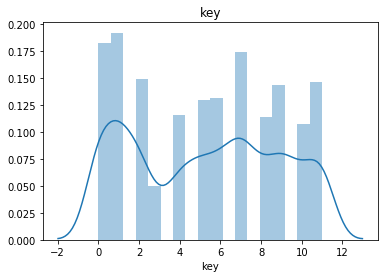

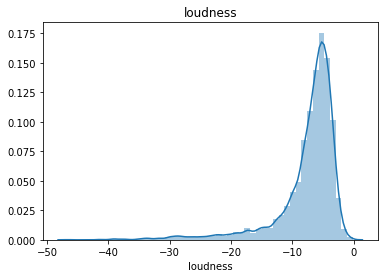

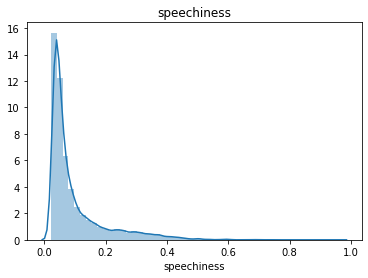

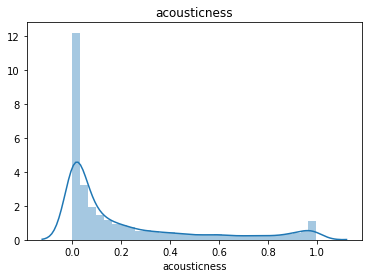

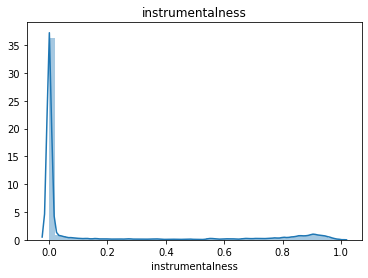

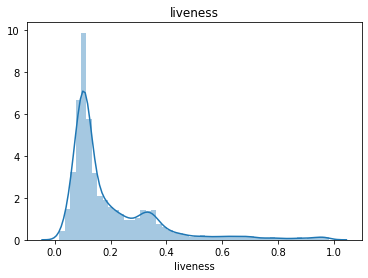

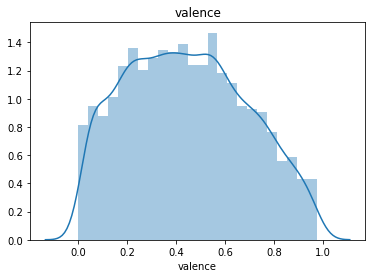

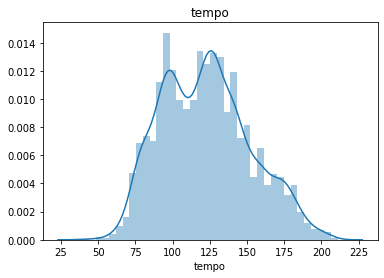

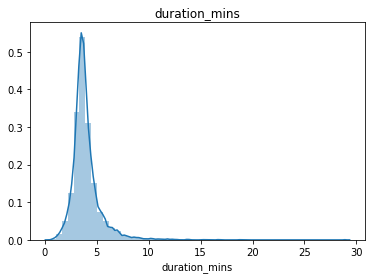

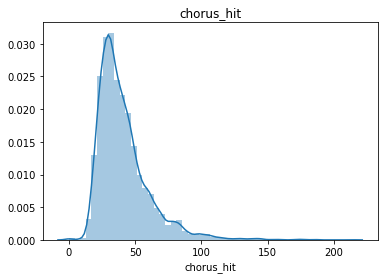

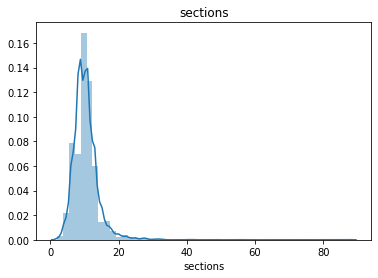

In [43]:
continuous_features = [feature for feature in dataset.columns if feature not in discrete_features and feature!='target']
for feature in continuous_features:
    sns.distplot(dataset[feature])
    plt.title(feature)
    plt.show()

It can be seen that danceability, valence and tempo follow a gaussian distribution while the others are mostly skewed. 

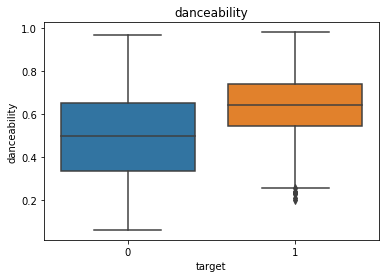

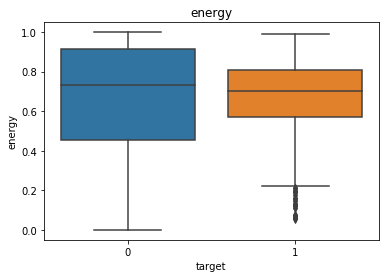

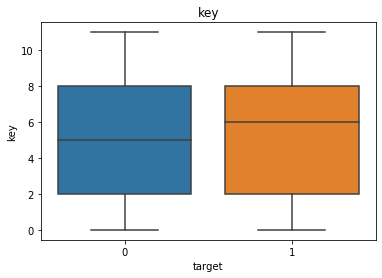

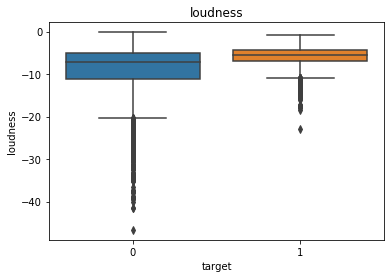

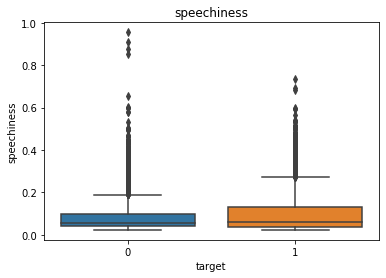

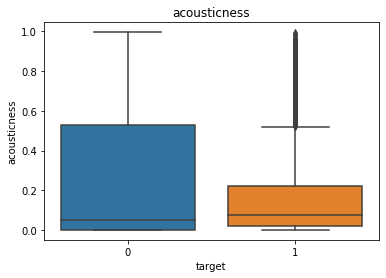

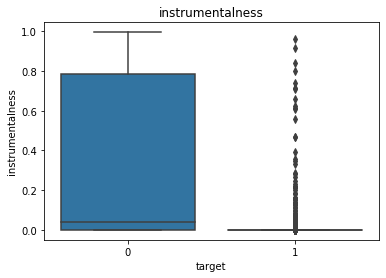

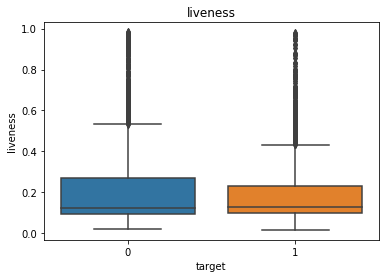

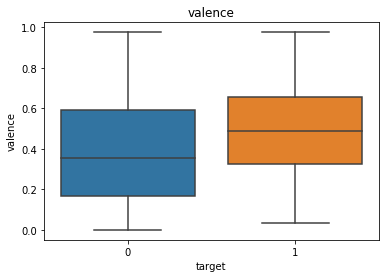

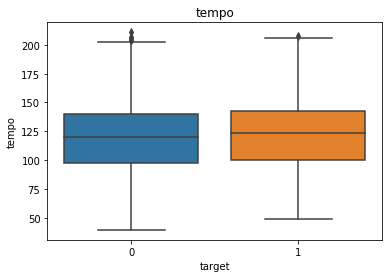

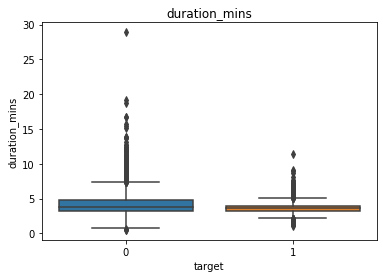

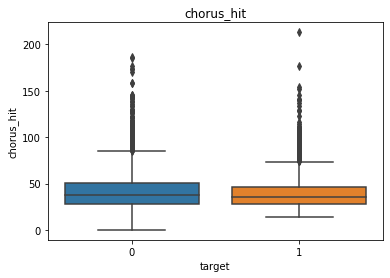

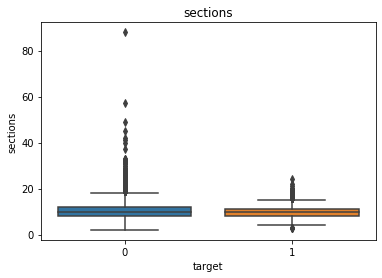

In [44]:
for feature in continuous_features:
    sns.boxplot(dataset['target'],dataset[feature])
    plt.title(feature)
    plt.show()

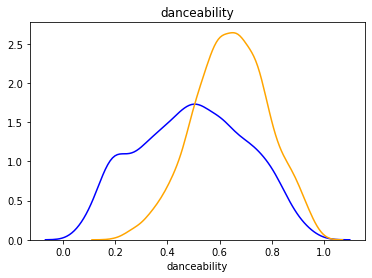

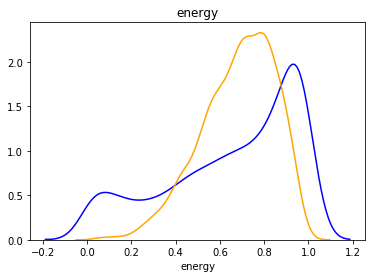

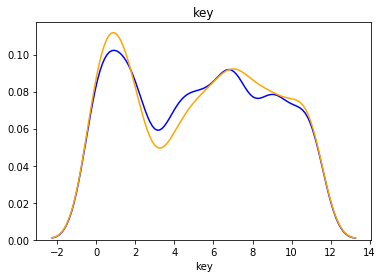

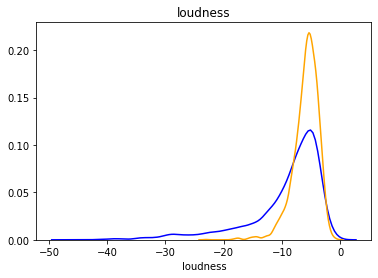

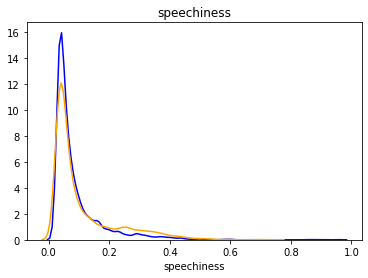

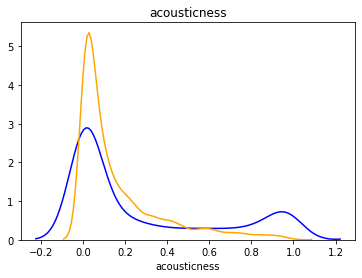

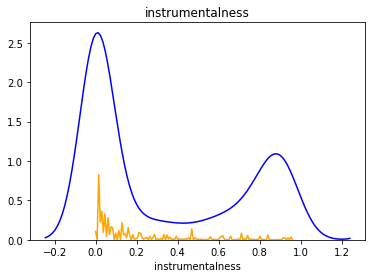

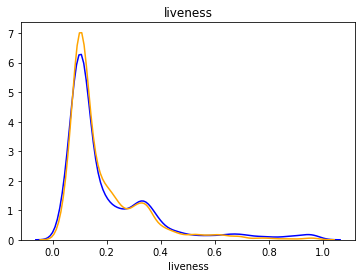

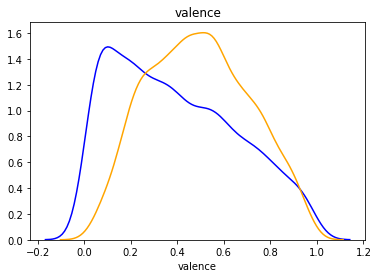

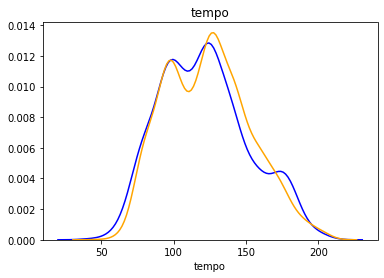

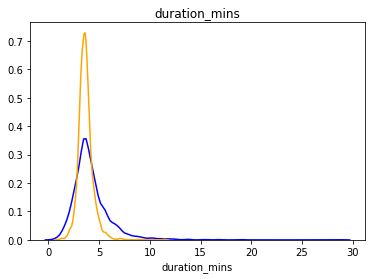

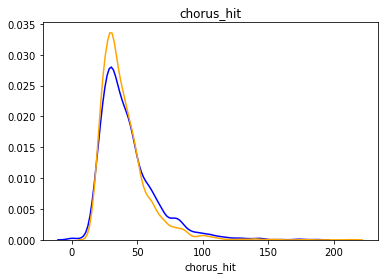

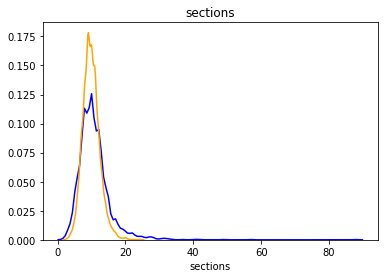

In [45]:
for feature in continuous_features:
    sns.distplot(dataset[dataset['target'] == 0][feature], hist=False, color="blue") 
    sns.distplot(dataset[dataset['target'] == 1][feature], hist=False, color="orange")
    plt.title(feature)
    plt.show()

From these visualizations we can come to the following conclusions :
1. Songs having high danceability are more likely to be a hit song while songs with low danceability are more likely to be a flop song
2. low energy slow songs and songs with very high energy are most likely to be flop while songs with moderate energy have more probability to become a hit song.
3. If the track isn't acoustic then more likely to be a hit.